# Project: AI-generated text detection 🤖
--------------------------------




*   Team Member Names: Linda Pham, Neehar Namjoshi, Suryakumar Mane
*   Group Number: Group 3


# 1 Importing Data


In [ ]:
import pandas as pd
# https://drive.google.com/file/d/1GGwxGoFAVSkTZs-0MAMfiUeIOU1GGefi/view?usp=drive_link
!gdown 1GGwxGoFAVSkTZs-0MAMfiUeIOU1GGefi

Downloading...
From: https://drive.google.com/uc?id=1GGwxGoFAVSkTZs-0MAMfiUeIOU1GGefi
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 81.8MB/s]


In [ ]:
# unzip it
!unzip ai-text-competition-data.zip

# read it
data = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


In [ ]:
print(data.shape)
data.head()

(11144, 772)


ID  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1   0.231980  -0.190620  -0.985933  -0.233773  -0.355879  -0.488884   
1   2   0.168223  -1.204551  -0.596952  -0.722583   0.284799  -0.238639   
2   3   0.522005  -0.759933  -1.209413   0.301834   0.361126   0.158161   
3   4   0.038746  -1.408335  -0.580810   0.353450   1.142353  -0.418879   
4   5  -0.307572   0.103575  -0.368605  -0.378654  -0.285990  -0.508058   

   feature_6  feature_7  feature_8  ...  feature_761  feature_762  \
0   0.254773  -0.121213  -0.820528  ...     0.101373     0.575414   
1  -0.410948  -0.090654   1.220703  ...     0.407270     0.769329   
2  -0.117013   0.313158   1.102455  ...     0.143658     0.874958   
3  -0.134133  -0.199796   1.071100  ...     0.728436     0.540930   
4  -0.254869  -0.108291  -0.095139  ...    -0.146845     0.497731   

   feature_763  feature_764  feature_765  feature_766  feature_767  \
0    -0.567646    -0.051293     0.455840     0.065538     0.020671   
1     0.555820     0.252843     0.603888     1.240028    -0.076253   
2     0.679421     0.393198     0.439103     0.742181    -0.430493   
3     1.968447     0.185315     0.630167     0.577032     0.117681   
4    -0.299924    -0.020024     0.975511    -0.342360    -0.428779   

   word_count  punc_num  ind  
0          25        14    0  
1          23         4    0  
2          29         8    0  
3          14         3    0  
4          35         9    0  

[5 rows x 772 columns]

In [ ]:
df=data

In [ ]:
df2=data

Lets see how the target variable is distributed

In [ ]:
df2['ind'].value_counts() # Unbalanced target class

0    10044
1     1100
Name: ind, dtype: int64

This dataset is pretty imbalanced dataset

Lets check for any missing values in the data.

In [ ]:
df2.isna().sum().sum() # No missing values

0

In [ ]:
df2.shape

(11144, 772)

# 2 Importing Modules

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import entropy

# for data prep
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D,LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

#score/confusion matrix/ f1-score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# 3 EDA

## 3.1 Boxplot of Punctuation

Taking a look at the spread of the punctuation column, not very good seperation is seen. But AI seems to use fewer punctuations as compared to humans (0: Humans, 1: AI)

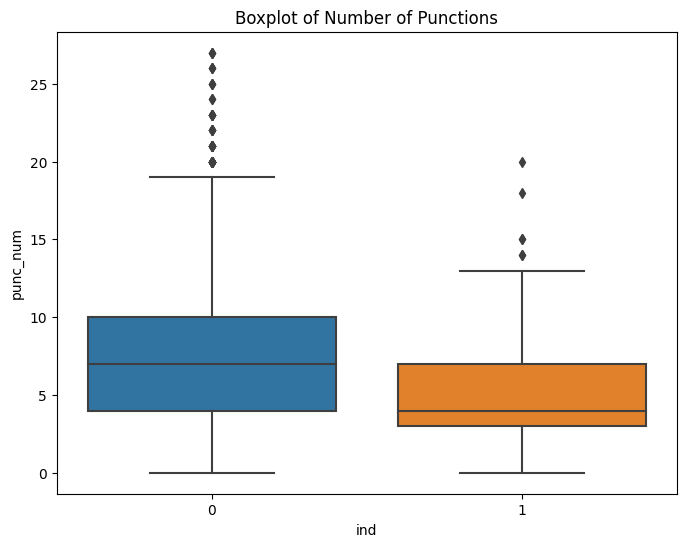

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = df2['punc_num'],x = df2['ind'])
plt.title('Boxplot of Number of Punctions')
plt.show()


## 3.2 Boxplot of Word Count

Word count shows close to no seperation, not very good insights can be drawn from this.

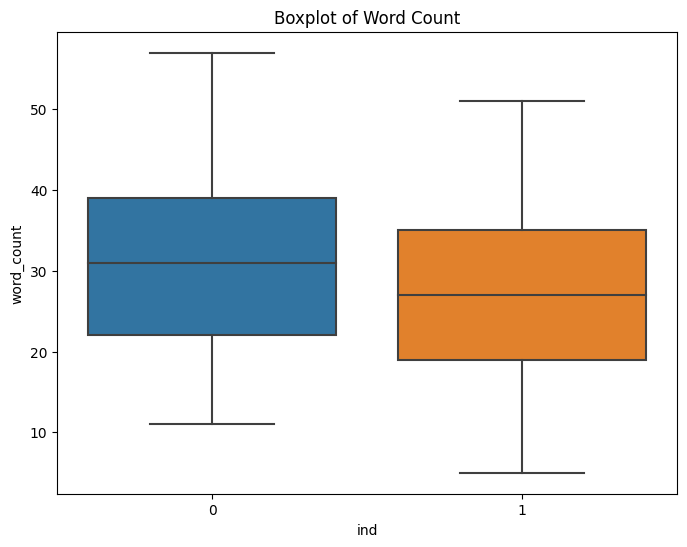

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = df2['word_count'],x = df2['ind'])
plt.title('Boxplot of Word Count')
plt.show()

## 3.3 Document Embeddings Correlation Matrix

Spot checking a few of the correlations between the document embeddings to get some sense of the data. It is a bit hard to see the correlation of all 768 document embeddings, but this will give us a sense of which ones might be correlated to each other.
For example, Feature 4 and 11 seem highly correlated.

In [ ]:
tmp3 = pd.concat([df2.iloc[:,1:20]],axis = 1)

In [ ]:
corr = tmp3.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
tmp3 = pd.concat([df2.iloc[:,300:357]],axis = 1)
corr = tmp3.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
tmp3 = pd.concat([df2.iloc[:,20:50]],axis = 1)
corr = tmp3.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

## 3.4 Heatmap of target variable with document embeddings

Checking target variable ind with respect to some embeddings. Overall, from the spot checking, the signal does not seem very strong. However, not all embeddings are checked here, so I am sure some powerful embeddings will be more visible in the permutation importance plots.

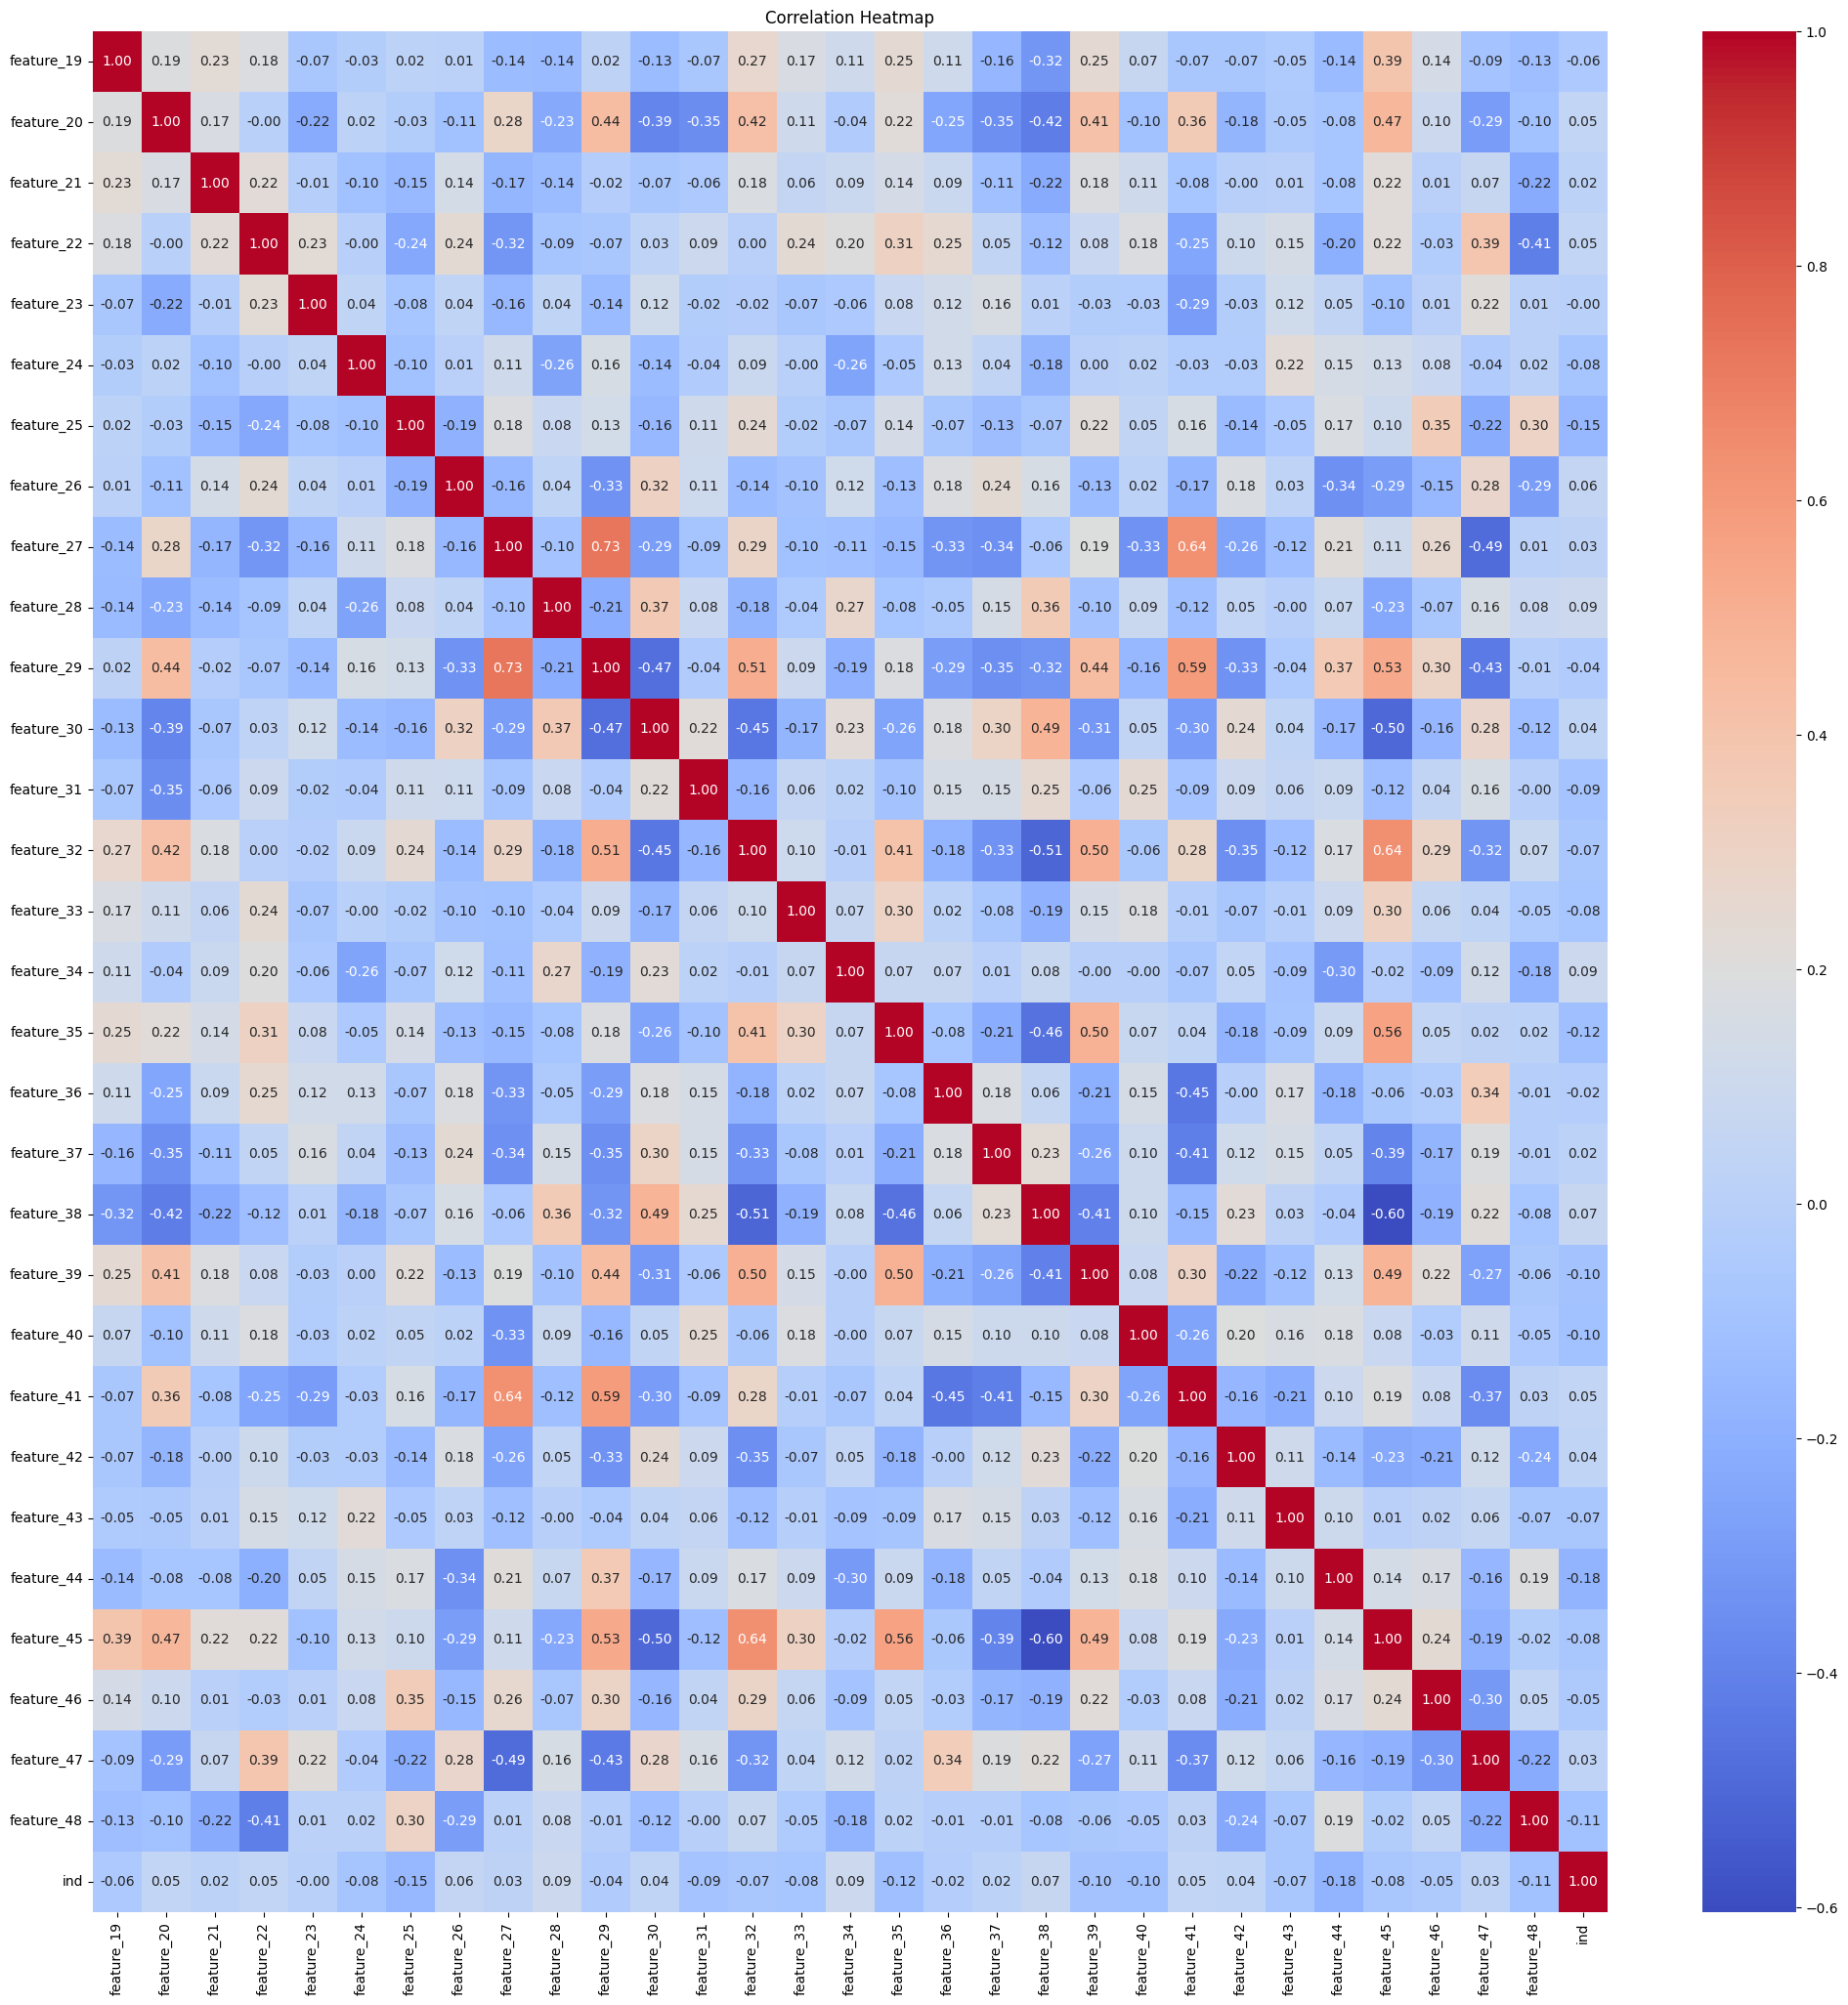

In [ ]:
tmp3 = pd.concat([df2.iloc[:,20:50],df2['ind']],axis = 1)
plt.figure(figsize=(25,25))
sns.heatmap(data=tmp3.corr(), annot=True, cmap='coolwarm', fmt=".2f") # annot shows the values, fmt restrics the values to 2 decimal places
plt.title('Correlation Heatmap')
plt.show()

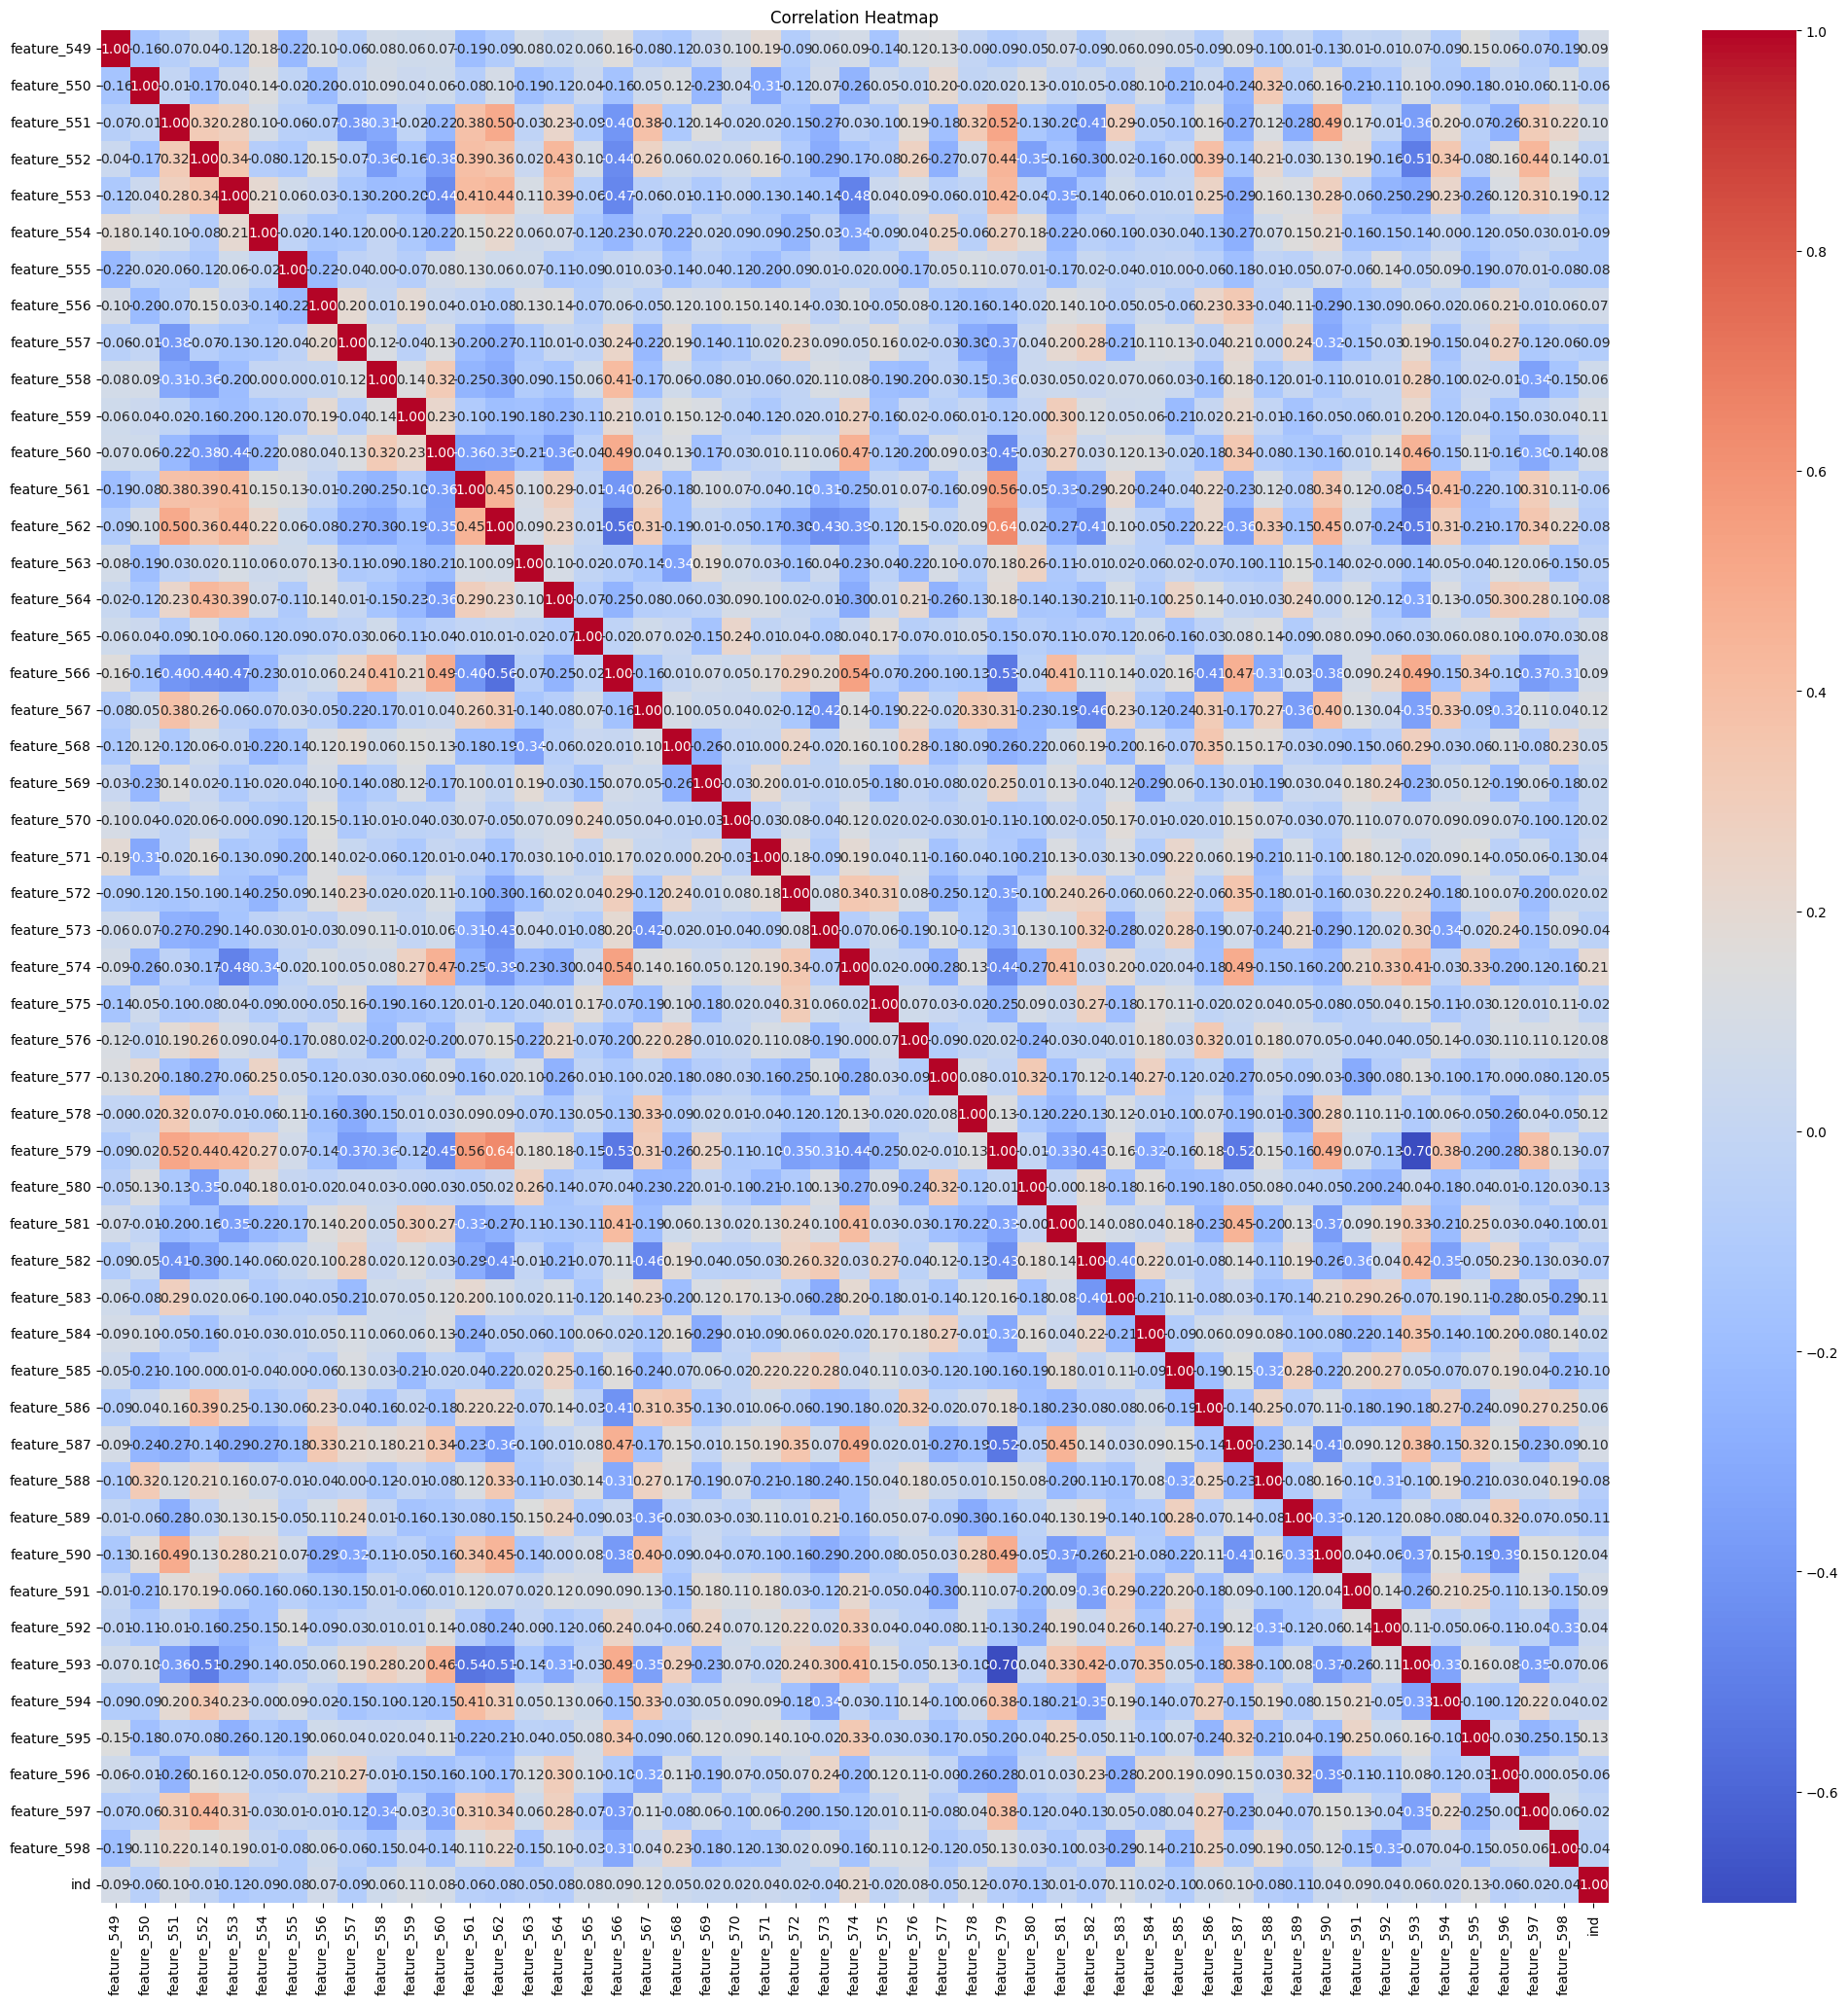

In [ ]:
tmp3 = pd.concat([df2.iloc[:,550:600],df2['ind']],axis = 1)
plt.figure(figsize=(25,25))
sns.heatmap(data=tmp3.corr(), annot=True, cmap='coolwarm', fmt=".2f") # annot shows the values, fmt restrics the values to 2 decimal places
plt.title('Correlation Heatmap')
plt.show()

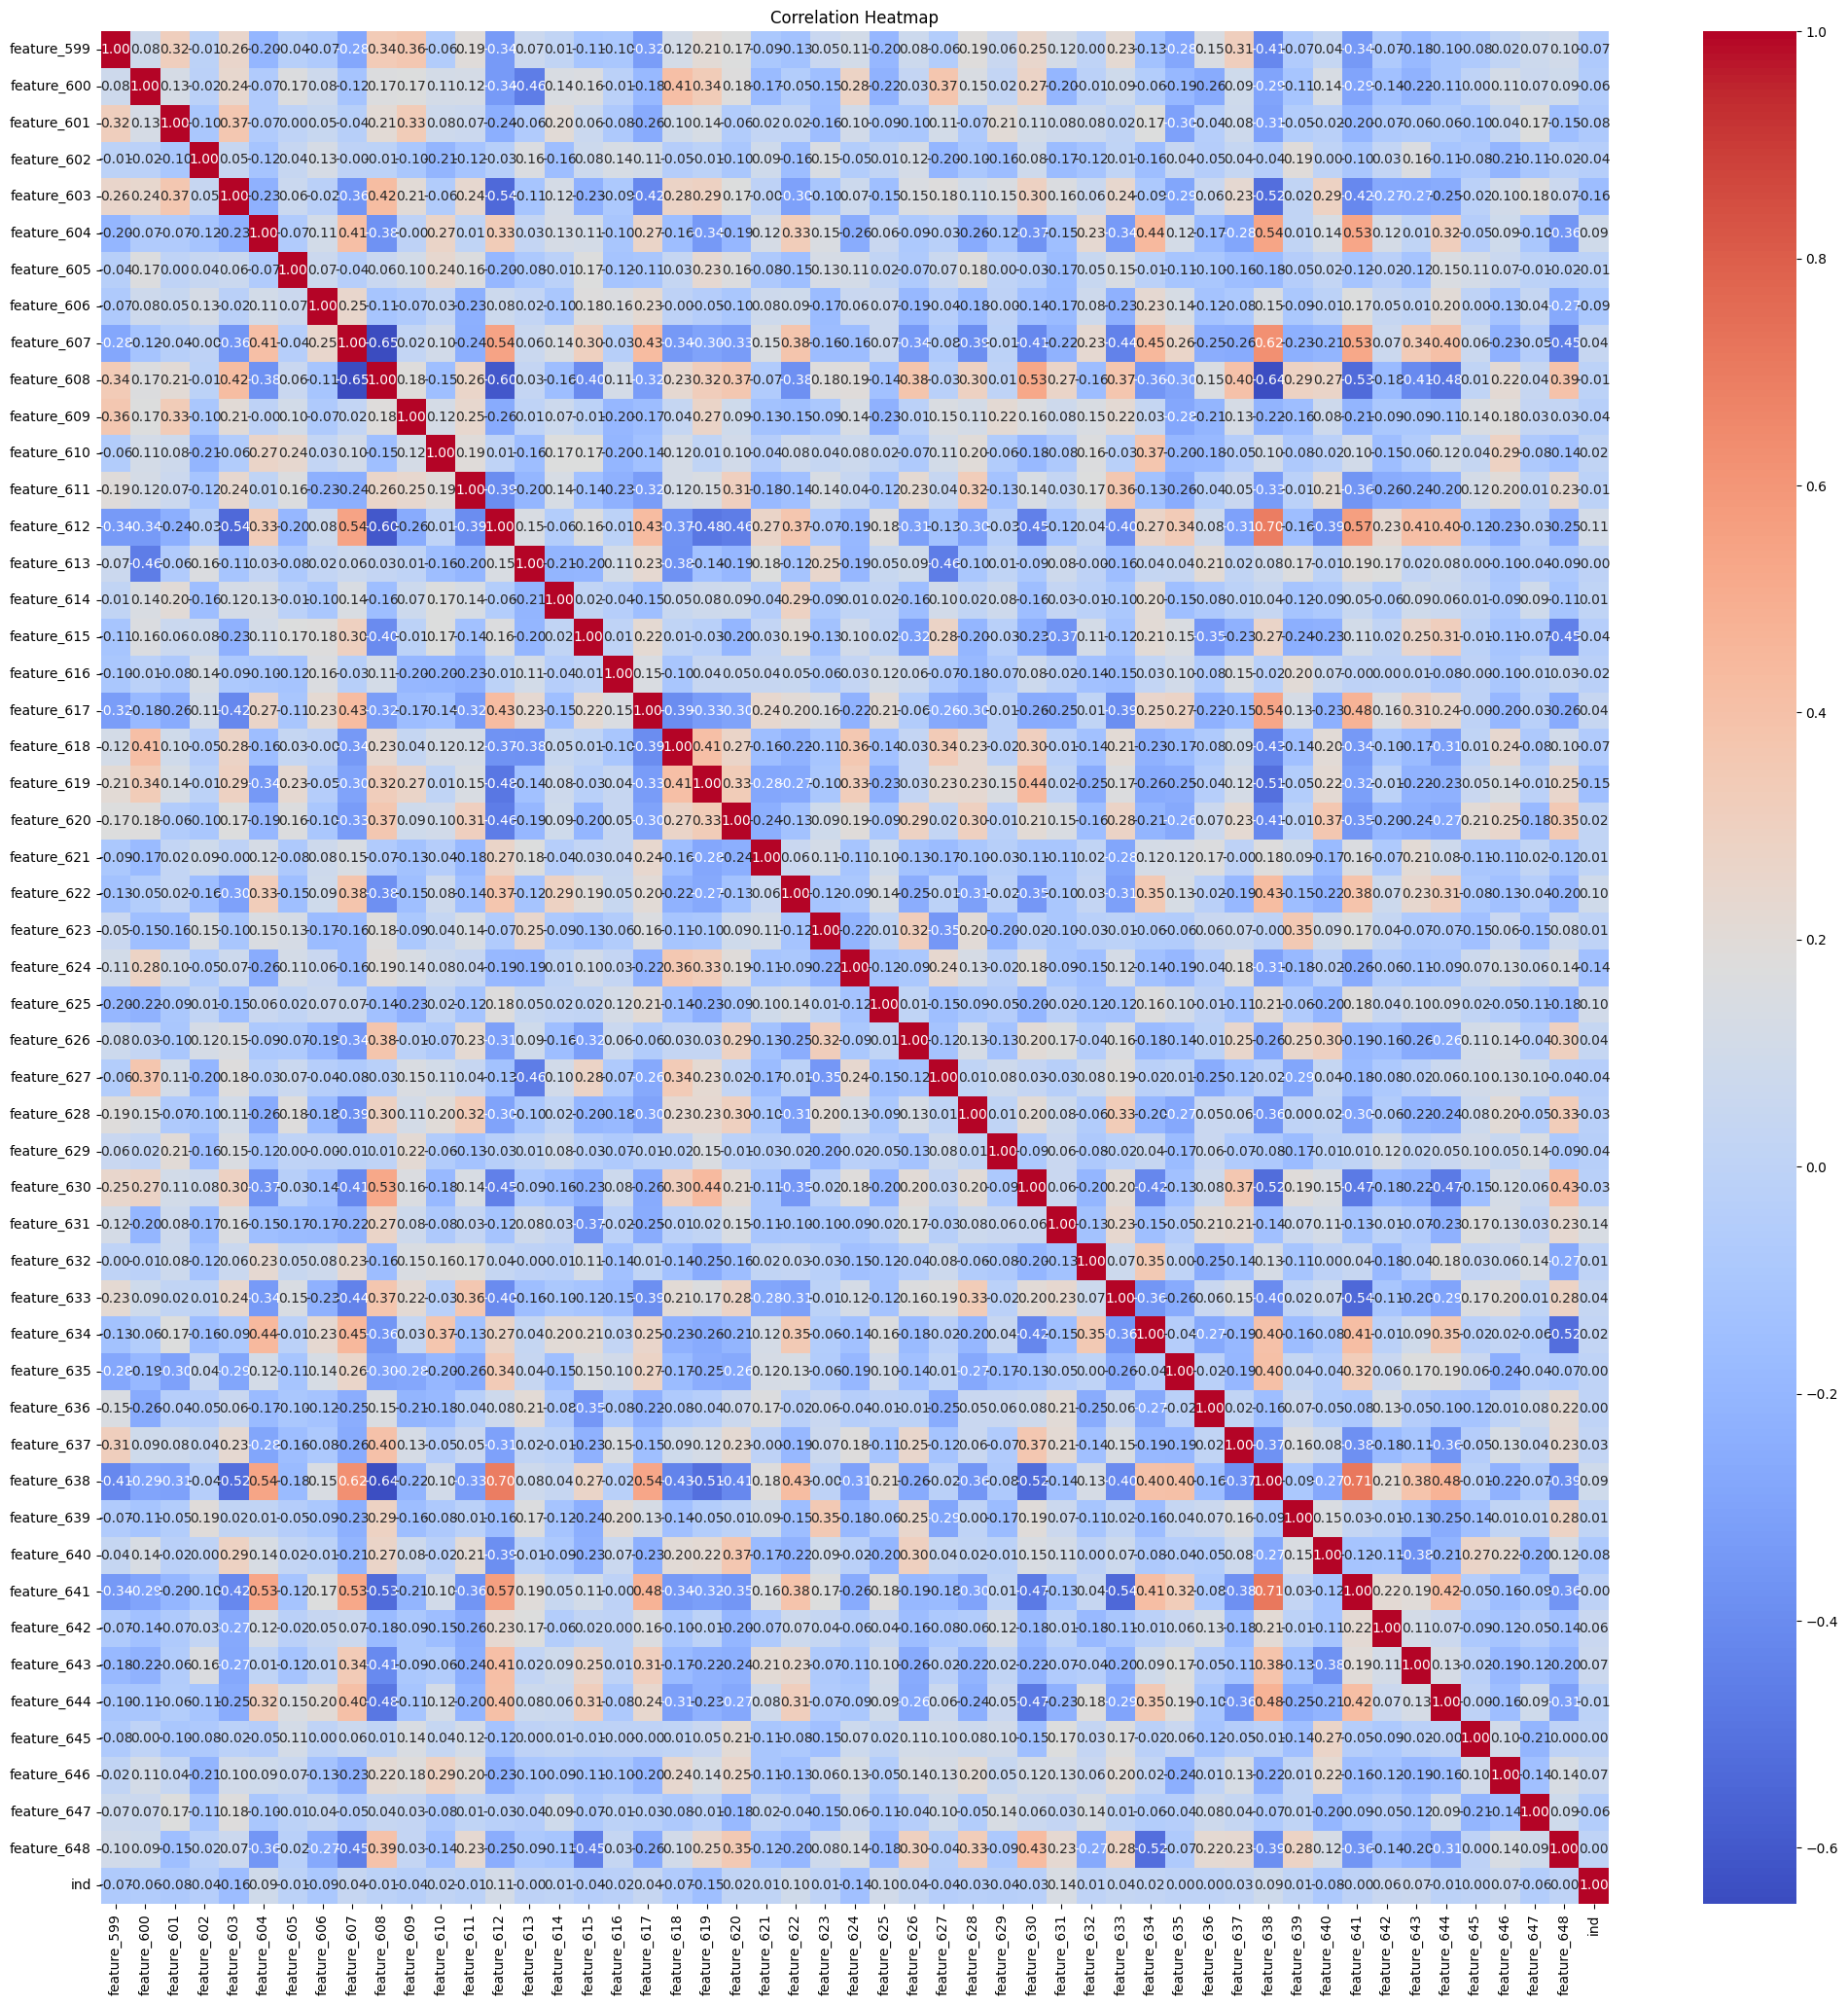

In [ ]:
tmp3 = pd.concat([df2.iloc[:,600:650],df2['ind']],axis = 1)
plt.figure(figsize=(25,25))
sns.heatmap(data=tmp3.corr(), annot=True, cmap='coolwarm', fmt=".2f") # annot shows the values, fmt restrics the values to 2 decimal places
plt.title('Correlation Heatmap')
plt.show()

## 3.5 General Statistics Plots of Embeddings and New Features Created

In [ ]:
# Select relevant columns for plotting
features_to_plot = ['mean', 'median', 'std', 'P_to_W_Den', 'Range', 'sum', 'punc_num', 'word_count']
ai_text_features = df2[df2['ind'] == 1][features_to_plot]
human_text_features = df2[df2['ind'] == 0][features_to_plot]

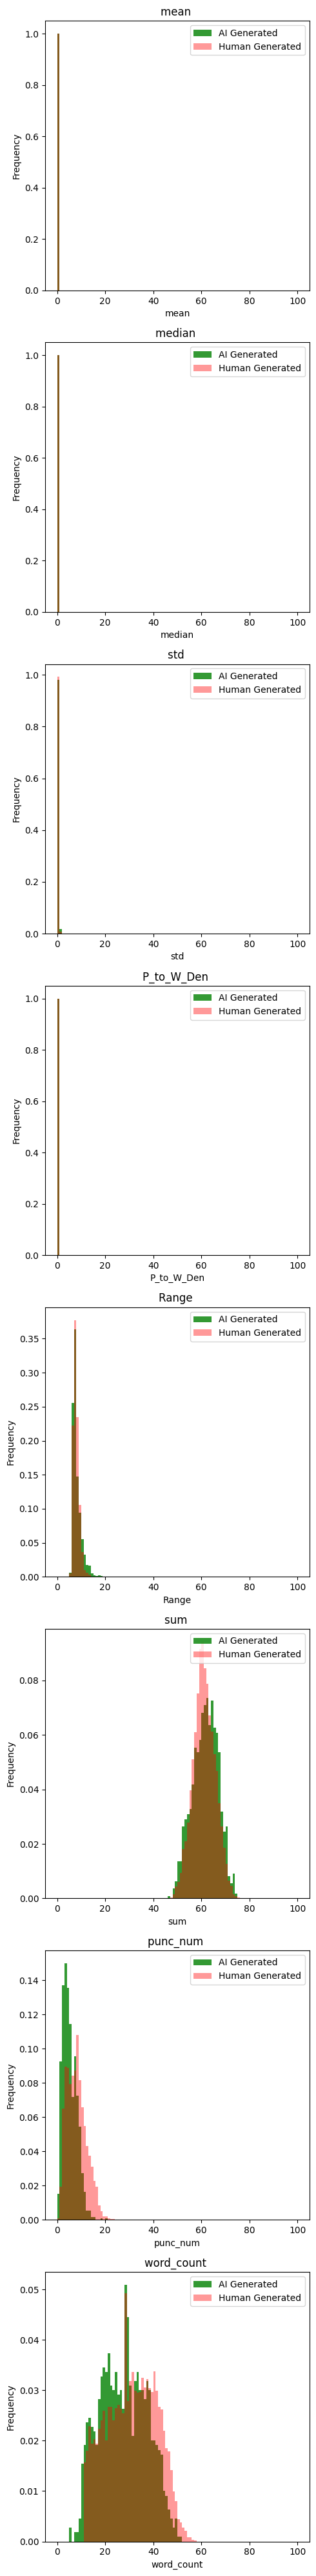

In [ ]:
# Percentage plot side by side
num_bins = 100
range_val = (0, 100)

fig, axs = plt.subplots(nrows=len(features_to_plot), figsize=(5, 5 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    axs[i].hist(
        ai_text_features[feature],
        bins=num_bins,
        range=range_val,
        alpha=0.8,
        color="green",
        edgecolor="None",
        density=True,
        label="AI Generated",
    )
    axs[i].hist(
        human_text_features[feature],
        bins=num_bins,
        range=range_val,
        alpha=0.4,
        color="red",
        edgecolor="None",
        density=True,
        label="Human Generated",
    )

    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"{feature} ")
    axs[i].legend(loc="upper right")
    axs[i].grid(False)

plt.tight_layout()
plt.show()


# 4 Feature Engineering

## 4.1 Statistical Features

Lets calculate some statistical features for each record and create a separate column for these statistical features.

It is possible that these feature distributions would be different for human/ AI text.

Features such as
1. Mean
2. Median
3. std
4. Punctuation to Word ratio ```['P_to_W_Den']```
5. sum
6. Range

have been calculated for each record in the dataset.

In [ ]:
# Extract the features columns in order to calculate the statistics for each record
feature_columns = [col for col in df.columns if col.startswith("feature_")]
#Calculating statistics for each record
df2['mean'] = df2[feature_columns].mean(axis=1)
df2['median'] = df2[feature_columns].median(axis=1)
df2['std'] = df2[feature_columns].std(axis=1)
df2['P_to_W_Den'] = df2['punc_num'] / df['word_count']
df2['sum'] = df2[feature_columns].sum(axis=1)
df2['Range'] = df2[feature_columns].apply(lambda row: row.max() - row.min(), axis=1)



In [ ]:
df2.head()

ID  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1   0.231980  -0.190620  -0.985933  -0.233773  -0.355879  -0.488884   
1   2   0.168223  -1.204551  -0.596952  -0.722583   0.284799  -0.238639   
2   3   0.522005  -0.759933  -1.209413   0.301834   0.361126   0.158161   
3   4   0.038746  -1.408335  -0.580810   0.353450   1.142353  -0.418879   
4   5  -0.307572   0.103575  -0.368605  -0.378654  -0.285990  -0.508058   

   feature_6  feature_7  feature_8  ...  feature_767  word_count  punc_num  \
0   0.254773  -0.121213  -0.820528  ...     0.020671          25        14   
1  -0.410948  -0.090654   1.220703  ...    -0.076253          23         4   
2  -0.117013   0.313158   1.102455  ...    -0.430493          29         8   
3  -0.134133  -0.199796   1.071100  ...     0.117681          14         3   
4  -0.254869  -0.108291  -0.095139  ...    -0.428779          35         9   

   ind      mean    median       std  P_to_W_Den        sum     Range  
0    0  0.078561  0.087923  0.642075    0.560000  60.334534  7.793405  
1    0  0.084996  0.098744  0.806262    0.173913  65.277120  7.229011  
2    0  0.081343  0.110489  0.752912    0.275862  62.471414  7.262510  
3    0  0.085201  0.108641  0.928043    0.214286  65.434081  7.796690  
4    0  0.072245  0.094511  0.691999    0.257143  55.484165  7.749907  

[5 rows x 778 columns]

# 5 Data Preparation

Lets prep the data for the modeling by separating the independent variable (in X) and dependent variable (in y)

The final dataframe shape looks like.

In [ ]:
df.shape

(11144, 778)

## 5.1 Separating X and y

Dropping the ```['ID', 'ind']``` columns from the ```df``` dataframe to have just the independent variables in X for modeling.

Creating target variable ```y``` dataframe by extracting ```['ind']``` from the ```df``` dataframe.

In [ ]:
X = df.drop(['ID', 'ind'], axis = 1)
y = df['ind']

In [ ]:
X.shape

(11144, 776)

In [ ]:
y.shape

(11144,)

## 5.2 Splitting the Data

Lets split the data, 90/10 (train vs test) using random state = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape # Checking shape and input into model

(10029, 776)

In [ ]:
y_train.shape

(10029,)

In [ ]:
X_train.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
11043   0.340939  -0.057671  -0.800137  -1.492317  -0.308187  -0.790117   
4165   -0.200836  -0.432826  -0.749740   0.234486   0.332252   0.330867   
6844    0.851236  -0.310664  -0.389326  -0.981194  -0.144302   0.027253   
3287   -0.477962  -0.501203  -1.077772  -0.889095  -0.519096  -0.148177   
4098    0.602829  -0.028369  -0.321926   1.511154  -0.001043  -0.379546   

       feature_6  feature_7  feature_8  feature_9  ...  feature_766  \
11043  -0.450816  -0.172626   0.087146  -1.190476  ...     0.015510   
4165   -0.921779   0.358875   0.747452  -1.622976  ...     0.893527   
6844   -0.186483   0.165053   0.475517  -1.124888  ...     0.373952   
3287   -0.185129   0.190657   0.323154  -1.211236  ...    -0.285733   
4098   -0.127575   0.197656  -0.121896  -1.304630  ...     0.891687   

       feature_767  word_count  punc_num      mean    median       std  \
11043    -0.075439          34         6  0.080935  0.117262  0.654300   
4165      0.879266          15         4  0.078902  0.100087  1.106173   
6844      0.145611          28         8  0.078208  0.093665  0.708834   
3287     -0.151135          41         4  0.083588  0.106527  0.633492   
4098     -0.030052          17         6  0.082235  0.084199  0.791245   

       P_to_W_Den        sum     Range  
11043    0.176471  62.157914  6.868773  
4165     0.266667  60.596815  9.384307  
6844     0.285714  60.063954  7.546606  
3287     0.097561  64.195453  7.006008  
4098     0.352941  63.156456  8.775527  

[5 rows x 776 columns]

## 5.3 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # import the scaler

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


lets check the shape of X_train, X_test and y_train for sanity check

In [ ]:
X_train.shape

(10029, 776)

In [ ]:
y_train.shape

(10029,)

In [ ]:
X_test.shape

(1115, 776)

In [ ]:
y_test.shape

(1115,)

# 6 Model

## 6.1 Model Architecture

Lets use the dense layers with dropouts to take care of the overfitting.

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                38850     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

Lets compile the model and also introduce hyperparameters to get better model results.

## 6.2 Model Compile

In [ ]:
# compile the model

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## 6.3 Early Callback

Early callback to let model run and not hit local validation accuracy maxima and return best weights.

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=50,
                   restore_best_weights=True)

In [ ]:
from keras import backend as K
K.clear_session()

## 6.4 Model Fit

In [ ]:
# Fitting the model
import time
start_time = time.time()

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100000,
                    batch_size=100,
                    shuffle=True,
                    verbose=1)


elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Epoch 1/100000
101/101 [==============================] - 2s 7ms/step - loss: 0.3492 - accuracy: 0.8832 - val_loss: 0.2292 - val_accuracy: 0.9193
Epoch 2/100000
101/101 [==============================] - 0s 5ms/step - loss: 0.2579 - accuracy: 0.9110 - val_loss: 0.1912 - val_accuracy: 0.9327
Epoch 3/100000
101/101 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.9177 - val_loss: 0.1810 - val_accuracy: 0.9426
Epoch 4/100000
101/101 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9277 - val_loss: 0.1773 - val_accuracy: 0.9426
Epoch 5/100000
101/101 [==============================] - 0s 5ms/step - loss: 0.1882 - accuracy: 0.9321 - val_loss: 0.1744 - val_accuracy: 0.9462
Epoch 6/100000
101/101 [==============================] - 0s 5ms/step - loss: 0.1779 - accuracy: 0.9328 - val_loss: 0.1622 - val_accuracy: 0.9480
Epoch 7/100000
101/101 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9385 - val_loss: 0.1705 -

# 7 Evaluation

## 7.1 Training and Validation accuracy Learning Curves

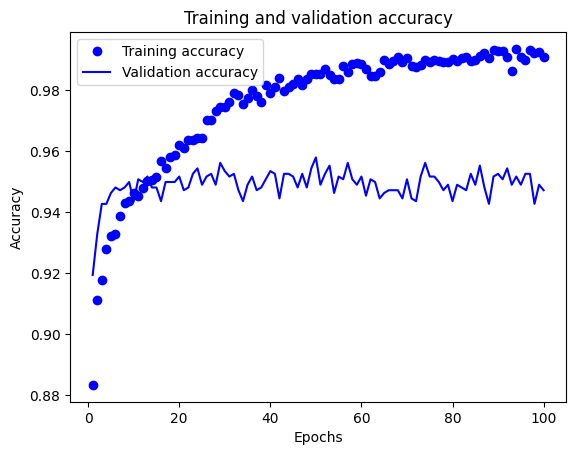

In [ ]:
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Training and Validation accuracy both go up and we can see where validation accuracy begins to plateau, with some noise. Early callback will take us back to last maxima seen, given no more maxima occur.

## 7.2 Training and Validation loss Learning Curves

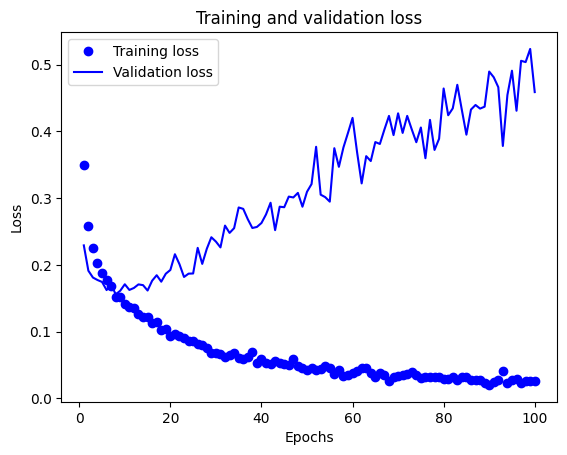

In [ ]:
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Loss curves look a little messy. Training loss is seen to decrease as epochs increase but validation loss seems to go up for some reason. This is most probalby caused due to overfitting, but again we will prune it back based on the first best maxima seen.

## 7.3 Confusion Matrices and Classification Reports

### 7.3.1 Confusion Matrix and Classification Report on Train Partition

In [ ]:
# Train Metrics
preds_train = np.round(model.predict(X_train),0)

# Confusion Matrix
print(confusion_matrix(y_train, preds_train))

# Classification Report
print(classification_report(y_train, preds_train))

314/314 [==============================] - 1s 2ms/step
[[9020   14]
 [  20  975]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9034
           1       0.99      0.98      0.98       995

    accuracy                           1.00     10029
   macro avg       0.99      0.99      0.99     10029
weighted avg       1.00      1.00      1.00     10029



On train, we can see precision and recall are both very good for the minority class and majority class, as expected, since the model essentially memorizes the data.

### 7.3.2 Confusion Matrix and Classification Report on Test Partition

In [ ]:
# Test Metrics

preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

# Classification Report
print(classification_report(y_test, preds))

35/35 [==============================] - 0s 2ms/step
[[1000   10]
 [  37   68]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1010
           1       0.87      0.65      0.74       105

    accuracy                           0.96      1115
   macro avg       0.92      0.82      0.86      1115
weighted avg       0.96      0.96      0.96      1115



On the contrary, we see a steep drop off in recall in the test partition for recall. Precision also takes a 0.1 hit downward. Therefore, affecting the 1's F-1 down to 0.74.

## ❗ 7.4 F-1 Score Calculation

### 7.4.1 F-1 score on train partition

In [ ]:
f1_score(y_train, preds_train)

0.9828629032258065

### 7.4.2 F-1 score on test partition

In [ ]:
f1_score(y_test, preds)

0.7431693989071039

## 7.5 Analysis/Inference on Report

* It can be seen that the final test F-1 score is 0.743, which seems pretty good, given the nature of this problem. We do not know what the document/sentences are and therefore what the document embeddings mean. However, having said this, recall seems to have a pretty steep drop-off, which is a bit concerning, while precision does not get a huge hit. There are definitely more improvements that can be made to improve the predictive power of this model.

# 8 Conclusion

1. This project was fun as we explored how the embeddings can be featured engineered. It was  challenging as there are no actual words, rather just numbers. This is were we leveraged statistical features to understand how data is distributed and hoped that neural network would detect hidden patterns in two dataset. Having said this, in our model we did not include any feature engineered columns as our model did better with just the raw data. This means that more emphasis and time would be need to be put into feature engineering.

2. Statistical features such as mean, median, std, sum, range were calculated for each record. Its distribution was also plotted to understand how these features are distributed in two categories. EDA analysis presents overview of how statistical features are distributed.

3. PCAs were introduced, however, it was found that the model performed better when all features were included in it. It is understood that model will perform little poorer when only certain dimensions of the data are considered. Hence, we decided to include all the features. The classification report and F-1 report for the PCA trial are reported in the appendix.

4. Standard scaler was used to fit the train dataset and transform the test dataset. Proper care was taken not to introduce data leakage in the model.

5. Plotting the learning curves gave us an idea how model is performing on the train and test dataset. It was crucial to know whether the model is over fitting or under fitting. It can be seen that our model in the learning curves, but early callback will help us prune it back.

6. Resampling techniques were also used, however, those did not provide better results. The code for and metrics are shown in the appendix below.

7. We tried to leverage EDA to see which of the embeddings played a bigger role in predicting our target class. However, from the EDA, we can only spot check some of the embeddings, not all can be seen using a heatmap or even correlation matrix as there are over 768 embedddings in total.

8. CNN/RNN produced very poor F-1 scores and results. Therefore, from our very first ierations we stuck to more simple dense layers with a lot of dropout to not overfit. Also we tried playing with autokeras, which gave us the hint of using a learning rate for Adam, but the model itself was not as good as the one used in the project. Moreover, we tried different activation functions, such as leaky relu, elu, tanh, sigmoid, and more, however again relu reigned king. Always giving the best performance, even after mixing and matching the activation functions.

# 9 Appendix

Some notable trials follow!

## 9.1 AutoKeras + Normalization Trial

Autokeras popped ou the following auto neural network. I was not able to recall the model with early stopping, but was able to capture all the parts of the network, as seen below.

In [ ]:
# build a model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               198912    
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 207169 (809.25 KB)
Trainable params: 207169 (809.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


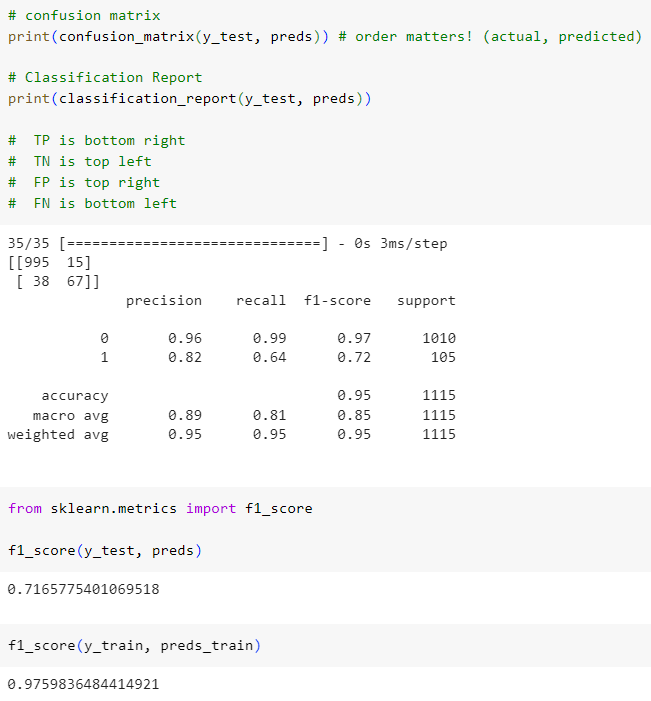

## 9.2 AutoKeras + Normalization + PCA Trial

I then took it a step further and built it with PCA feature engineering, with a decent F-1 score, but not better than the one I had above.

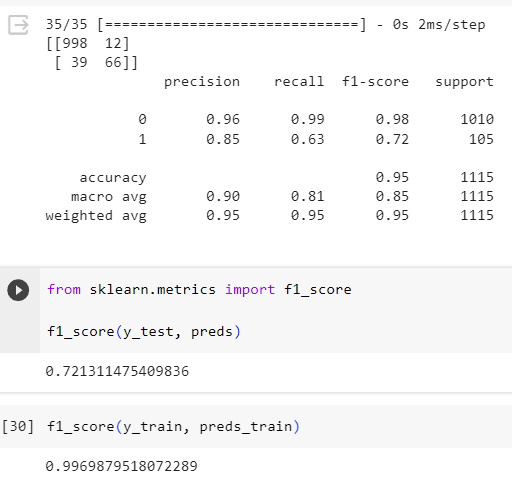

## 9.3 Undersampling/Oversampling Trial

I attemped a lot of undersampling and oversampling as well as undersampling the majority class and oversampling the minority class methods, but did not get excellent F-1 scores either.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import CondensedNearestNeighbour

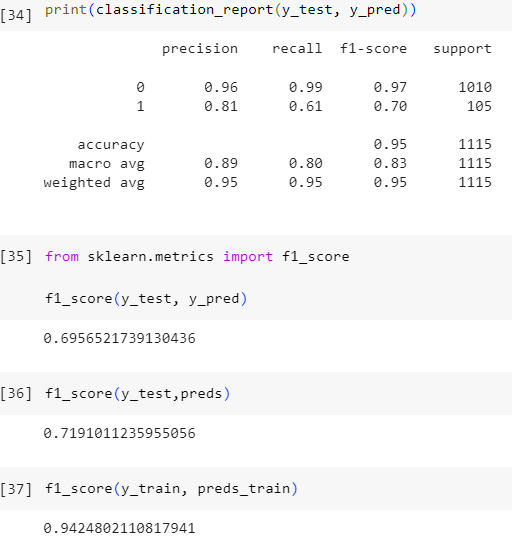